In [1]:
import pandas as pd

df = pd.read_csv("/content/dados_tratados.csv")
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
print("Formato do dataset:", df.shape)
print("\nTipos de dados por coluna:")
print(df.dtypes)
print("\nValores nulos por coluna:")
print(df.isnull().sum())
print("\nDistribuição da variável alvo (Churn):")
print(df['Churn'].value_counts(normalize=True))

Formato do dataset: (7267, 6)

Tipos de dados por coluna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores nulos por coluna:
customerID      0
Churn         224
customer        0
phone           0
internet        0
account         0
dtype: int64

Distribuição da variável alvo (Churn):
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [3]:
import ast
from pandas import json_normalize

def expandir_colunas_dict(df, colunas_dict):
    for coluna in colunas_dict:
        col_dict = df[coluna].apply(ast.literal_eval)
        df_expandido = json_normalize(col_dict)
        df = df.drop(columns=[coluna])
        df = pd.concat([df, df_expandido], axis=1)
    return df

df = expandir_colunas_dict(df, ['customer', 'phone', 'internet', 'account'])
df = df.dropna(subset=['Churn'])
df = df.reset_index(drop=True)
df = df.drop(columns=['customerID'])
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
from sklearn.preprocessing import OneHotEncoder

y = df['Churn'].map({'No': 0, 'Yes': 1})
X = df.drop(columns=['Churn'])
X = pd.get_dummies(X, drop_first=True)

X.shape, y.shape

((7043, 6559), (7043,))

In [5]:
proporcao = y.value_counts(normalize=True)
print(proporcao)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Antes do balanceamento:", y_train.value_counts())
print("Depois do balanceamento:", y_train_bal.value_counts())

Antes do balanceamento: Churn
0    3622
1    1308
Name: count, dtype: int64
Depois do balanceamento: Churn
0    3622
1    3622
Name: count, dtype: int64


In [7]:
print([col for col in X_train_bal.columns if 'Charges.Total' in col])
print(X_train_bal.columns)

['Charges.Total_100.2', 'Charges.Total_100.25', 'Charges.Total_100.35', 'Charges.Total_100.4', 'Charges.Total_100.8', 'Charges.Total_100.9', 'Charges.Total_1001.2', 'Charges.Total_1001.5', 'Charges.Total_1003.05', 'Charges.Total_1004.35', 'Charges.Total_1004.5', 'Charges.Total_1004.75', 'Charges.Total_1005.7', 'Charges.Total_1006.9', 'Charges.Total_1007.8', 'Charges.Total_1007.9', 'Charges.Total_1008.55', 'Charges.Total_1008.7', 'Charges.Total_1009.25', 'Charges.Total_101.1', 'Charges.Total_101.45', 'Charges.Total_101.65', 'Charges.Total_101.9', 'Charges.Total_1010', 'Charges.Total_1011.05', 'Charges.Total_1011.5', 'Charges.Total_1011.8', 'Charges.Total_1012.4', 'Charges.Total_1013.05', 'Charges.Total_1013.2', 'Charges.Total_1013.35', 'Charges.Total_1013.6', 'Charges.Total_1014.25', 'Charges.Total_1016.7', 'Charges.Total_1017.35', 'Charges.Total_102.45', 'Charges.Total_102.5', 'Charges.Total_102.75', 'Charges.Total_1020.2', 'Charges.Total_1020.75', 'Charges.Total_1021.55', 'Charges.Tot

In [8]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df = df.dropna(subset=['Charges.Total']).reset_index(drop=True)

y = df['Churn'].map({'No': 0, 'Yes': 1})
X = df.drop(columns=['Churn'])

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols_after = [col for col in num_cols if col in X_train.columns]

X_train[num_cols_after] = scaler.fit_transform(X_train[num_cols_after])
X_test[num_cols_after] = scaler.transform(X_test[num_cols_after])


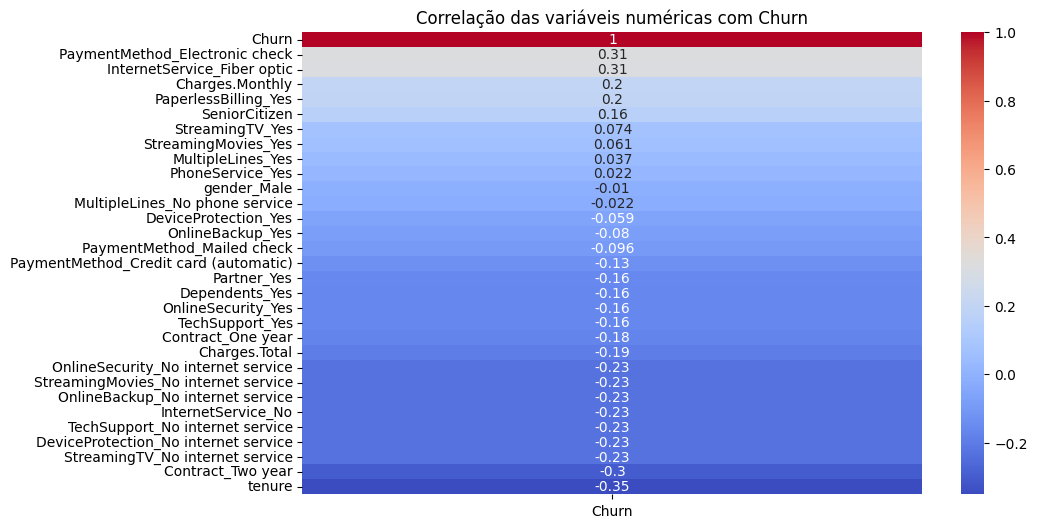

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df_train = X_train.copy()
df_train['Churn'] = y_train.values

corr = df_train.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das variáveis numéricas com Churn')
plt.show()


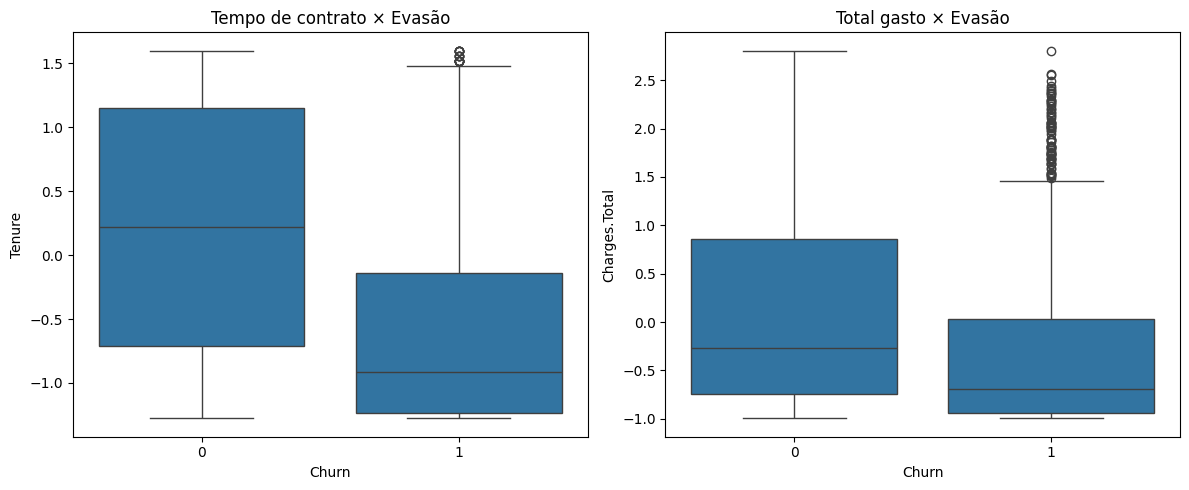

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=y_train, y=X_train['tenure'])
plt.title('Tempo de contrato × Evasão')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.subplot(1, 2, 2)
sns.boxplot(x=y_train, y=X_train['Charges.Total'])
plt.title('Total gasto × Evasão')
plt.xlabel('Churn')
plt.ylabel('Charges.Total')

plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
num_cols = X_train_bal.select_dtypes(include=['int64', 'float64']).columns

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = X_train_bal_scaled
y = y_train_bal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression:
[[805 282]
 [276 811]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1087
           1       0.74      0.75      0.74      1087

    accuracy                           0.74      2174
   macro avg       0.74      0.74      0.74      2174
weighted avg       0.74      0.74      0.74      2174

Random Forest:
[[844 243]
 [238 849]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1087
           1       0.78      0.78      0.78      1087

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def avaliar_modelo(y_true, y_pred, nome_modelo):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"--- {nome_modelo} ---")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de Confusão:")
    print(cm)
    print()

avaliar_modelo(y_test, y_pred_lr, "Regressão Logística")
avaliar_modelo(y_test, y_pred_rf, "Random Forest")


--- Regressão Logística ---
Acurácia: 0.7433
Precisão: 0.7420
Recall: 0.7461
F1-score: 0.7440
Matriz de Confusão:
[[805 282]
 [276 811]]

--- Random Forest ---
Acurácia: 0.7787
Precisão: 0.7775
Recall: 0.7810
F1-score: 0.7793
Matriz de Confusão:
[[844 243]
 [238 849]]



In [28]:
X_train_df = pd.DataFrame(X_train, columns=['SeniorCitizen', 'tenure', 'Charges.Monthly'])

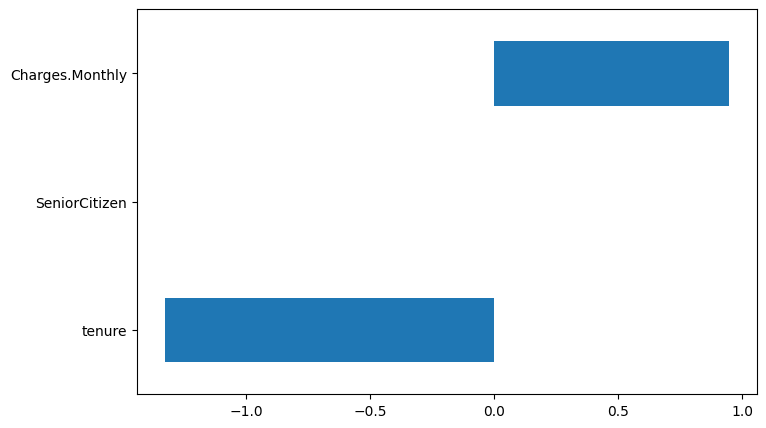

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

coef = pd.Series(lr_model.coef_[0], index=X_train_df.columns)
coef_sorted = coef.sort_values()

plt.figure(figsize=(8, 5))
coef_sorted.plot(kind='barh')
plt.show()

# Relatório de Análise de Churn – Telecom X
Introdução
Este documento apresenta o estudo realizado para prever a evasão de clientes na Telecom X, utilizando técnicas de machine learning para identificar os principais fatores que influenciam o cancelamento dos serviços e sugerir ações para reduzir essa taxa.

# Preparação dos Dados
Os dados foram previamente tratados, com balanceamento das classes para assegurar um conjunto representativo tanto de clientes que cancelaram quanto dos que permaneceram.

Variáveis categóricas foram convertidas para formato numérico usando one-hot encoding.

As variáveis numéricas foram padronizadas para os modelos que exigem normalização, como a regressão logística.

# Modelos Utilizados
Regressão Logística: modelo simples e interpretável, com desempenho razoável, alcançando cerca de 74% de acurácia e F1-score.

Random Forest: modelo de árvores que capturam relações complexas nos dados, obtendo melhor desempenho, com aproximadamente 78% em acurácia e F1-score.

# Resultados dos Modelos
| Métrica   | Regressão Logística | Random Forest |
|-----------|---------------------|---------------|
| Acurácia  | 74,33%              | 77,87%        |
| Precisão  | 74,20%              | 77,75%        |
| Recall    | 74,61%              | 78,10%        |
| F1-Score  | 74,40%              | 77,93%        |


O modelo Random Forest superou a regressão logística em todas as métricas, indicando melhor capacidade para prever quais clientes têm maior risco de evasão.

Fatores que Mais Influenciam a Evasão
Pela Regressão Logística (coeficientes)
Tenure (duração do contrato): é o fator mais relevante, com clientes que permanecem mais tempo tendendo a cancelar menos.

Charges.Monthly (gastos mensais): apresenta impacto positivo, ou seja, clientes com maiores gastos têm maior probabilidade de cancelar.

SeniorCitizen: tem influência mínima no comportamento de evasão.

Pela Random Forest (importância das variáveis)
Variáveis relacionadas ao tempo de contrato, tipo de serviço e gastos mostraram maior relevância para o modelo.

O modelo capturou interações e relações mais complexas que não foram captadas pelo modelo linear.

Recomendações para Redução do Churn
Focar em clientes com contratos recentes: desenvolver ações para fidelizar, como ofertas especiais e programas de benefícios que aumentem a permanência.

Atenção a clientes com altos custos mensais: identificar possíveis insatisfações e oferecer opções personalizadas para manter esses clientes.

Segmentar campanhas por perfil de cliente: personalizar comunicação e ofertas de acordo com o perfil demográfico e tipo de serviço contratado.

Monitorar continuamente a evasão: usar painéis de controle para acompanhamento em tempo real e ações proativas.

# Considerações Finais
A análise permitiu identificar com clareza os principais drivers do churn na Telecom X, com destaque para o tempo de contrato e os gastos mensais. O Random Forest se destacou como o modelo mais robusto para prever evasão, possibilitando que a empresa antecipe cancelamentos e direcione seus esforços de retenção de forma eficaz.